# Thoracic Surgery for Lung Cancer
---

<img style="float: left; margin-left: 10px; margin-right: 30px; height: 200px" src="img/lung_cancer_surgery.jpg">

<p>Lung cancer is the leading cause of cancer-related deaths in the world. In the United States, lung cancer claims more lives every year than colon cancer, prostate cancer, and breast cancer combined.</p>

<p>The American Cancer Society’s estimates for lung cancer in the United States for 2018 are:
<ul>
<li>About 234,030 new cases of lung cancer (121,680 in men and 112,350 in women)
<li>About 154,050 deaths from lung cancer (83,550 in men and 70,500 in women) 
</ul>
</p>

<p>Despite the very serious prognosis (outlook) of lung cancer, some people with earlier stage cancers are cured. More than 430,000 people alive today have been diagnosed with lung cancer at some point.</p>


### Abstract
---

<p>The data is dedicated to classification problem related to the post-operative life expectancy in the lung cancer patients: class 1 - death within one year after surgery, class 2 - survival.</p>



### Data Set Information
---

<img style="float: left; margin-left: 10px; margin-right: 30px; height: 120px" src="img/med_univ_wroclaw.jpg">

<p>The data was collected retrospectively at Wroclaw Thoracic Surgery Centre for patients who underwent major lung resections for primary lung cancer in the years 2007-2011. The Centre is associated with the Department of Thoracic Surgery of the Medical University of Wroclaw and Lower-Silesian Centre for Pulmonary Diseases, Poland, while the research database constitutes a part of the National Lung Cancer Registry, administered by the Institute of Tuberculosis and Pulmonary Diseases in Warsaw, Poland.</p>

|   Attribute  |  Description  |
|:--------------|:--------------|
|   **Diagnosis**  | ICD-10 codes for primary and secondary as well multiple tumors if any |
|   **FVC**  | Amount of air which can be forcibly exhaled from the lungs after taking the deepest breath possible |
|   **FEV1**  | Volume that has been exhaled at the end of the first second of forced expiration |
|   **Performance**  | Performance status on Zubrod scale, Good (0) to Poor (2) |
|   **Pain**  | Pain before surgery (T = 1, F = 0)  |
|   **Haemoptysis**  | Coughing up blood, before surgery (T = 1, F = 0) |
|   **Dyspnoea**  | Difficulty or labored breathing, before surgery (T = 1, F = 0)  |
|   **Cough**  | Symptoms of Coughing, before surgery (T = 1, F = 0)   |
|   **Weakness**  | Weakness, before surgery (T = 1, F = 0)  |
|   **Tumor_Size**  |  T in clinical TNM - size of the original tumor, 1 (smallest) to 4 (largest) |
|   **Diabetes_Mellitus**  | Type 2 diabetes mellitus (T = 1, F = 0)   |
|   **MI_6mo**  | Myocardial infarction (Heart Attack), up to 6 months prior(T = 1, F = 0)   |
|   **PAD**  | Peripheral arterial diseases (T = 1, F = 0)   |
|   **Smoking**  | Patient smoked (T = 1, F = 0)   |
|   **Asthma**  | Patient has asthma (T = 1, F = 0)   |
|   **Age**  | Age at surgery   |
|   **Death_1yr**  | 1 year survival period - (T) value if died (T = 1, F = 0)    |


In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [4]:
df = pd.read_csv('data/ThoracicSurgery.csv')

In [3]:
df.head()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [4]:
df.describe()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
count,454.000000,454.000000,454.00000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,3.092511,3.287952,2.51685,0.795154,0.059471,0.136564,0.055066,0.696035,0.171806,1.733480,0.074890,0.004405,0.017621,0.828194,0.004405,62.777533,0.151982
std,0.715817,0.872347,0.77189,0.531459,0.236766,0.343765,0.228361,0.460475,0.377628,0.707499,0.263504,0.066299,0.131715,0.377628,0.066299,8.449634,0.359400
min,1.000000,1.440000,0.96000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.000000
25%,3.000000,2.600000,1.96000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,3.000000,3.160000,2.36000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,3.000000,3.840000,2.97750,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000
max,8.000000,6.300000,5.48000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000


In [5]:
# Stats for live and death after 1 yr patients
live = df[df['Death_1yr'] == 0]
death = df[df['Death_1yr'] == 1]

cond = ['FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis', 'Dyspnoea', 'Cough', 'Weakness',\
        'Tumor_Size', 'Diabetes_Mellitus', 'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age']

l = [np.mean(live[c]) for c in cond]
d = [np.mean(death[c]) for c in cond]

ld = pd.DataFrame(data={'Attribute': cond, 'Live 1yr Mean': l, 'Death 1yr Mean': d})
ld = ld.set_index('Attribute')

print('Death: {:d}, Live: {:d}'.format(len(death), len(live)))
print("1 year death: {:.2f}% out of 454 patients".format(np.mean(df.Death_1yr)*100))
ld

Death: 69, Live: 385
1 year death: 15.20% out of 454 patients


,Death 1yr Mean,Live 1yr Mean
Attribute,,
FVC,3.195072,3.304597
FEV1,2.383188,2.540805
Performance,0.913043,0.774026
Pain,0.101449,0.051948
Haemoptysis,0.202899,0.124675
Dyspnoea,0.115942,0.044156
Cough,0.797101,0.677922
Weakness,0.246377,0.158442
Tumor_Size,2.014493,1.683117


### How many patients died in 1 year?

---

<img style="float: left; margin-left: 10px; margin-right: 30px; height: 120px" src="img/lung_cancer.jpg">

Out of the 454 patients, 69 did not survive 1 year after their operations, which is 15.20% of the total sample size.

Looking at the means of the two different patient classes, there are features with significant differences and those with minor. However, just looking at the numbers without scaling them appropriately to each other makes comparison difficult. So, let's do an approximate normalization of each value for convenient comparison.


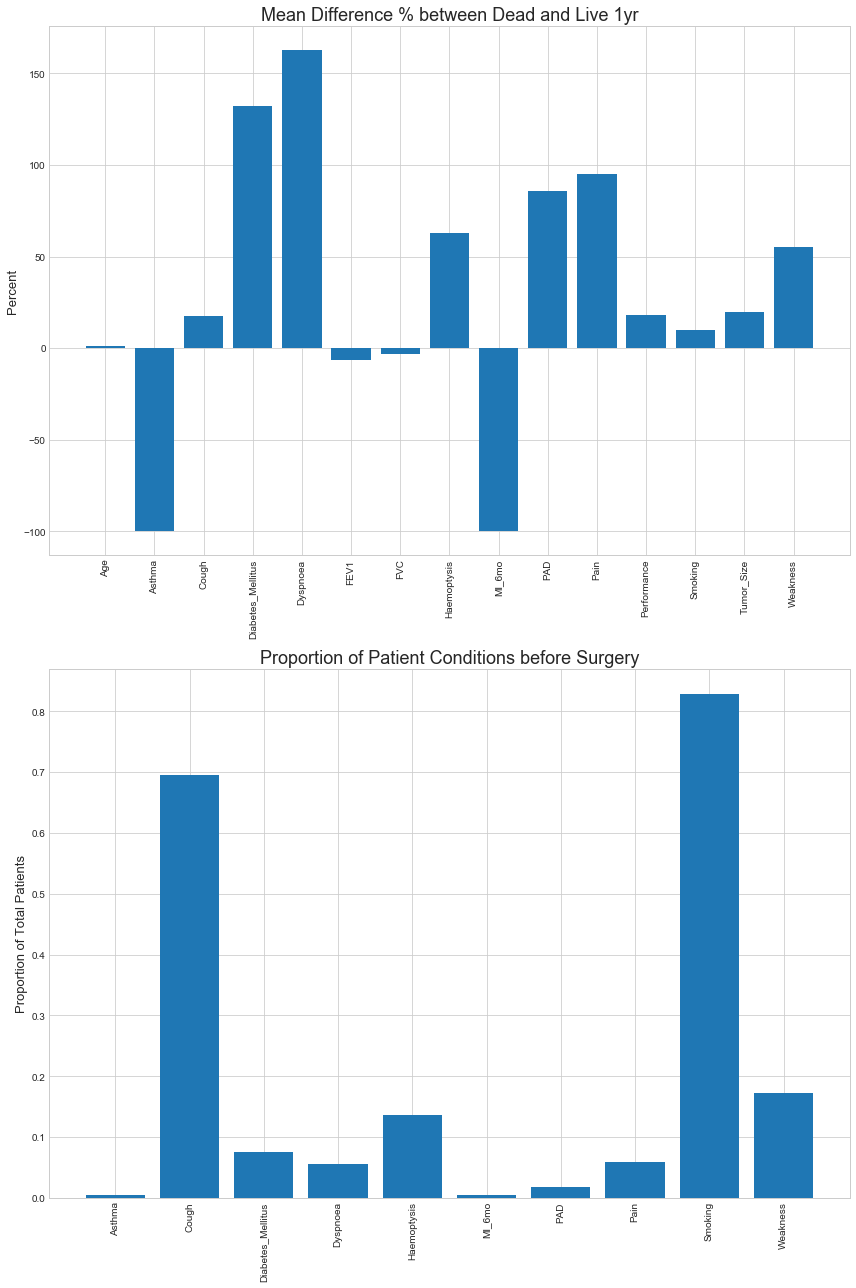

In [6]:
# Percentage difference in means of live vs death patients
d = np.array(d)
l = np.array(l)

p_diff = (d-l)/l*100

fig, axes = plt.subplots(2,1,figsize=(12,18))

axes[0].bar(cond, p_diff)
axes[0].set_title('Mean Difference % between Dead and Live 1yr', fontsize=18)
axes[0].set_xticks(cond)
axes[0].set_xticklabels(cond, rotation=90)
axes[0].set_ylabel('Percent', fontsize=13)

# Count plot of true/false condition columns

tf_col = ['Pain', 'Haemoptysis', 'Dyspnoea', 'Cough', 'Weakness', 'Diabetes_Mellitus', 'MI_6mo', 'PAD', 'Smoking', 'Asthma']
tf_sum = [df[col].sum()/454 for col in tf_col]

axes[1].bar(tf_col, tf_sum)
axes[1].set_xticks(tf_col)
axes[1].set_xticklabels(tf_col, rotation=90)
axes[1].set_ylabel('Proportion of Total Patients', fontsize=13)
axes[1].set_title('Proportion of Patient Conditions before Surgery', fontsize=18)

plt.tight_layout()

plt.show()

### What are the differences for the 1 year death patients?
---

<img style="float: right; margin-left: 10px; margin-right: 30px; height: 110px" src="img/steth.png">

Looking at the graph, one can see easily compare the attributes to determine features of significance.
The most notable attributes for those who died are *Dyspnoea*, *Diabetes Mellitus*, *Pain*, *PAD*, and *Haemoptysis* (in decreasing order), indicating that for those who died, these features were strongly presented. *Asthma* and *MI of 6 months* have negative 100% values, and looking at the numerical values reveals that those who died did not exhibit asthma or MI. Although the mean differences are useful, further investigation of the number of instances of each attributes in combination with the mean differences will improve our decision on what features to focus on.

The overall count should be considered when comparing mean differences, because the lower count numbers will have larger fluctuations to small differences. The count of *Cough* and *Smoking* are most noteworthy indicating these conditions are strongly correlated to those patients who are to receive thoracic surgery for lung cancer, but the mean differences are a small positive value indicating more representation in the dead patients. Looking at the count graph for noteworthy features from the mean differences graph, most of the values are low in count. To best assess if these attributes' mean differences are of significance, a hypothesis test of whether the mean difference is significant will help narrow down the features of interest.

### Categorical Data (Diagnosis, Tumor_Size, Performance)
---

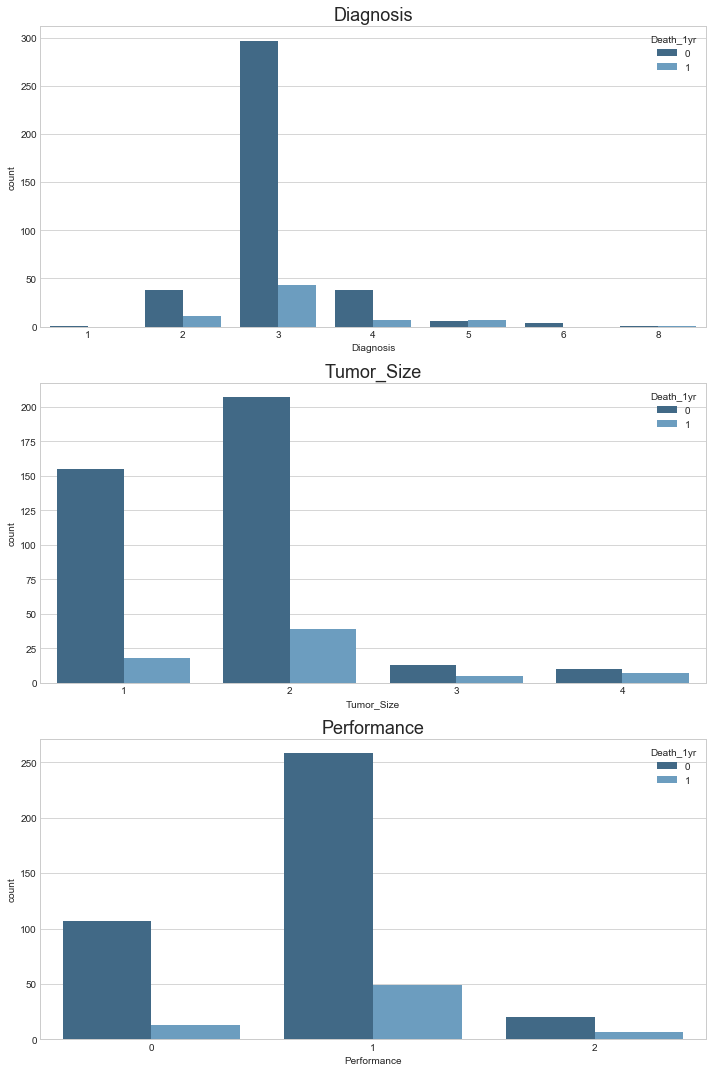

In [7]:
# Count plots of Diagnosis, Tumor_Size, Performance with difference of live and death data

fig, axes = plt.subplots(3,1,figsize=(10,15))

sns.countplot(x='Diagnosis', hue='Death_1yr', data=df, palette='Blues_d', ax=axes[0]).set_title('Diagnosis', fontsize=18)
sns.countplot(x='Tumor_Size', hue='Death_1yr', data=df, palette='Blues_d', ax=axes[1]).set_title('Tumor_Size', fontsize=18)
sns.countplot(x='Performance', hue='Death_1yr', data=df, palette='Blues_d', ax=axes[2]).set_title('Performance', fontsize=18)

plt.tight_layout()

#### Analysis of live and death patients for Diagnosis, Tumor_Size, and Performance

<img style="float: left; margin-left: 0px; margin-right: 15px; height: 150px" src="img/diag.jpg">

For Diagnosis, the large majority of patients are in category 3. The other categories are relatively small while category 4, 2, and 5 should be considered for their counts in that order. The proportion of live to dead at a glance seems to be similar for the diagnosis categories except for 5, where the death count is higher than the live count, which indicates this diagnosis is more fatal than the others even with surgery.

For Tumor Size, categories 1 and 2 are the majority. At a glance, the proportion of the dead to live generally increases with the tumor size ranging from 1 to 4, indicating the higher tumor size correlates to higher chance of death even with surgery. Category 4 tumor size is most even in its split between death and live patient data. Also looking at the dead to live mean difference graph, the dead had higher means indicating larger tumor sizes overall.

For Performance, categories are 1, 0, 2 in decreasing order of count. Performance 0 category reveals low death count and good proportion to live data, which makes sense since on the Zubrod scale 0 is good and 2 is poor. Category 1 and 2 display similar proportion to live and dead patients, but with category 1 having a majority of the count. Referring to the dead to live mean difference graph, the dead had higher means indicating the dead on average had poorer performance with a higher Zubrod score than the live.

### Hypothesis Test of Mean Differences between Live and Death Patients

---

All the observations above highlighted the trends and patterns in the attributes. However, to ascertain their significance, a hypothesis test will be useful to see if these patterns and trends are not just by chance.

> * **Null Hypothesis:** The 1 year live and death patients have the same distribution and mean. (Tested for each attribute.)
  * **Test Statistic:** Mean difference between death and live patients.
  * **Significance Level:** 0.05

In [8]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""
    perm_replicates = np.empty(size)
    
    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

In [9]:
# Hypothesis testing with Permutations of data
condition = ['FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis', 'Dyspnoea', 'Cough', 'Weakness',\
             'Tumor_Size', 'Diabetes_Mellitus', 'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age']
p_val = []

for c in condition:
    empirical_diff_means = diff_of_means(death[c], live[c])
    perm_replicates = draw_perm_reps(death[c], live[c], diff_of_means, size=10000)
    if empirical_diff_means > 0:
        p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)
        p_val.append(p)
    else:
        p = np.sum(perm_replicates <= empirical_diff_means) / len(perm_replicates)
        p_val.append(p)

print(list(zip(condition, p_val)))

[('FVC', 0.1709), ('FEV1', 0.055500000000000001), ('Performance', 0.0275), ('Pain', 0.1045), ('Haemoptysis', 0.065000000000000002), ('Dyspnoea', 0.023599999999999999), ('Cough', 0.029899999999999999), ('Weakness', 0.0613), ('Tumor_Size', 0.00050000000000000001), ('Diabetes_Mellitus', 0.019800000000000002), ('MI_6mo', 0.7258), ('PAD', 0.35260000000000002), ('Smoking', 0.065199999999999994), ('Asthma', 0.71379999999999999), ('Age', 0.26939999999999997)]


#### Results for Hypothesis Test

>With significance level of **0.05**,
 * **Cannot Reject Null Hypothesis:** FVC, FEV1, Pain, Haemoptysis, Weakness, MI_6mo, PAD, Smoking, Asthma, Age
 * **Reject Null Hypothesis:** Performance, Dyspnoea, Cough, Tumor_Size, Diabetes_Mellitus

The null hypothesis stated that the means of life and death patients were the same for the attributes tested. With the results above, the attributes of significance are those that rejected the null hypothesis. To highlight the trends for those that rejected the null hypothesis, the mean difference percentages are listed below.

**Mean difference % for death in 1 year patients for attributes of significance:**
* Performance = 17.96% 
* Dyspnoea = 162.57% 
* Cough = 17.58%
* Tumor_Size = 19.69%
* Diabetes_Mellitus = 132.49%

### Numerical Data (Age, FVC, FEV1)
---

The mean difference graph reveals little difference in Age while there is a small negative difference for the dead compared to the live. So this indicates the dead patients on average performed worse for lung capacity compared to the live patients.

The plots below will further investigate the relationship between these three numerical data columns.

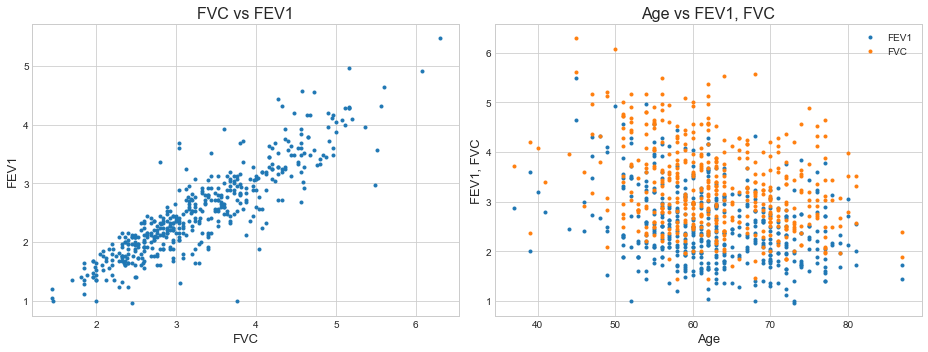

In [10]:
# Scatter plot for FVC, FEV1, Age columns

fig, axes = plt.subplots(1,2,figsize=(13,5))
axes[0].plot(df.FVC, df.FEV1, linestyle='none', marker='.')

axes[0].set_xlabel('FVC', fontsize=13)
axes[0].set_ylabel('FEV1', fontsize=13)
axes[0].set_title('FVC vs FEV1', fontsize=16)

axes[1].plot(df.Age, df.FEV1, linestyle='none', marker='.', label='FEV1')
axes[1].plot(df.Age, df.FVC, linestyle='none', marker='.', label='FVC')
axes[1].set_xlabel('Age', fontsize=13)
axes[1].set_ylabel('FEV1, FVC', fontsize=13)
axes[1].legend()
axes[1].set_title('Age vs FEV1, FVC', fontsize=16)

plt.tight_layout()

In [11]:
# Correlation coefficients for FVC and FEV1
np.corrcoef(df.FVC, df.FEV1)[0,1]

0.88754527338290001

In [12]:
# Correlation coefficients for Age and FVC
np.corrcoef(df.Age, df.FVC)[0,1]

-0.29942991966049098

In [13]:
# Correlation coefficients for Age and FEV1
np.corrcoef(df.Age, df.FEV1)[0,1]

-0.30961662730798911

#### Correlations of FVC, FEV1, and Age

<img style="float: left; margin-left: 0px; margin-right: 0px; height: 110px" src="img/fvc.png">

From looking at the graphs, one can see a strong positive correlation between FVC and FEV1, while Age has a slight negative trend in the graphs. The correlation coefficient calculated for FVC and FEV1 is *0.89*, which is very strong on top of the fact that the data points are grouped together to show a visible linear trend. On the other hand, Age's correlation with FVC and FEV1 are about *-0.3* for both, but the data points are more spread out. The mild negative trend for age against the other two features makes intuitive sense as it would be expected that as you get older, your lung capacity decreases.

In [14]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""    
    n = len(data)    
    x = np.sort(data)    
    y = np.arange(1, n+1) / n    
    return x, y

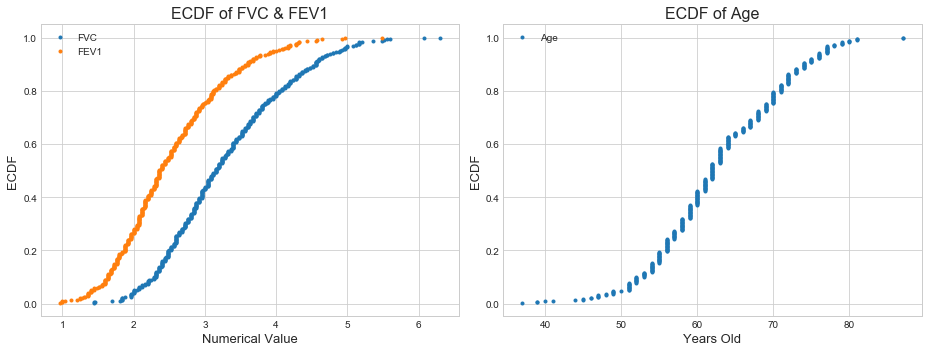

In [15]:
# ECDF of FVC, FEV1, Age
x_fvc, y_fvc = ecdf(df.FVC)
x_fev1, y_fev1 = ecdf(df.FEV1)
x_age, y_age = ecdf(df.Age)

fig, axes = plt.subplots(1,2,figsize=(13,5))
axes[0].plot(x_fvc, y_fvc, marker='.', linestyle='none', label='FVC')
axes[0].plot(x_fev1, y_fev1, marker='.', linestyle='none', label='FEV1')

axes[0].set_xlabel('Numerical Value', fontsize=13)
axes[0].set_ylabel('ECDF', fontsize=13)
axes[0].legend(loc='upper left')
axes[0].set_title('ECDF of FVC & FEV1', fontsize=16)

axes[1].plot(x_age, y_age, marker='.', linestyle='none', label='Age')
axes[1].set_xlabel('Years Old', fontsize=13)
axes[1].set_ylabel('ECDF', fontsize=13)
axes[1].legend(loc='upper left')
axes[1].set_title('ECDF of Age', fontsize=16)

plt.tight_layout()

#### Distribution of Numerical Data

All numerical data display fairly normal distributions. FVC and FEV1 are comparable in their distribution with different means; FEV with its mean at 2.52 and FVC at 3.29. Age mean is at 63.

### Summary of EDA
---

* Out of the 454 patients, 69 died and 385 lived the 1 year period after surgery. So, 15.20% of patients died.

* Several features presented strongly for those who died: Dyspnoea, Diabetes Mellitus, Pain, PAD, and Haemoptysis (Top 5 in decreasing order).

* Overall, most patients who received surgery smoked (~80%) and presented with symptoms of coughing (~70%), while the rest of the attributes presented under 20% of the total patients.

* Majority of patients were categorized as diagnosis code 3. The proportion of live to dead is similar for the diagnosis codes. For tumor size, most of the patients are in category 1 and 2, and the data presents a trend of more proportion of dead as tumor size increases. For performance, the trend observed is more proportion of dead as performance zubrod score increases, which means patient performance decreases.

* Hypothesis testing reveals attributes of significance: Performance, Dyspnoea, Cough, Tumor_Size, Diabetes_Mellitus.

* As Age increases, the FEV1 and FVC decrease with correlations of -0.31 and -0.30, respectively. FEV1 and FVC are highly correlated with a value of 0.89.

### Predictive Modeling
---

<img style="float: left; margin-left: 0px; margin-right: 10px; height: 160px" src="img/ml.jpg">

So now that we have thoroughly explored the patterns and trends in the data set, the next step is to utilize machine learning models to see if we can predict the target variable, Death_1yr, with the feature variables.

A key point to emphasize is that since biological systems are complex, I am not concluding the causation of death from any of these feature variables or combination there of. The goal of this report is to observe if there is a strong correlation to be made from the feature variables to predict the target variable. Since the data set is mostly live patients (85%), just predicting all live patients will give a high accuracy score ~85%, so I will have to evaluate on if the model correctly predicts death patients at a high rate or an accuracy higher than 85%.

If a strong model is found, I hope this model can be used in conjunction with other machine learning models and data sets involving lung cancer patients and thoracic surgery patients to grow the knowledge base on how to best create a solution to this problem. 

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict #,train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import itertools

In [7]:
# All attributes excluding target variable, Asthma, and MI_6mo
X = df.drop(['Death_1yr', 'MI_6mo', 'Asthma'], axis=1)

# Attributes of Significance from Hypothesis Testing
X2 = df[['Performance', 'Dyspnoea', 'Cough', 'Tumor_Size', 'Diabetes_Mellitus']]

y = df['Death_1yr']
class_names = ['Live', 'Death']

In [26]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [19]:
def model_report(model, X, weight, title):
    """Takes in classifier model with X data and class weight value to display scores and confusion matrix."""
    clf = model(class_weight={0: 1, 1: weight}, random_state=1111)

    predicted = cross_val_predict(clf, X, y, cv=5)

    print(accuracy_score(y, predicted))
    print(confusion_matrix(y, predicted))
    print(classification_report(y, predicted))

    cnf_matrix = confusion_matrix(y, predicted)
    np.set_printoptions(precision=2)

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title=title)
    plt.show()

In [21]:
def class_weights_plot(model, title):
    """Plots influence of class weights to different classifier models for X2 data."""
    class_weights = [1,2,3,4,5,6,7,8,9,10]
    acc_scores = []
    correct_deaths = []

    for cw in class_weights:
        clf = model(class_weight={0: 1, 1: cw}, random_state=1111)
        predicted = cross_val_predict(clf, X2, y, cv=5)

        acc_scores.append(accuracy_score(y, predicted))
        correct_deaths.append(confusion_matrix(y, predicted)[1,1]/68)

    plt.plot(class_weights, acc_scores, marker='.', label='Accuracy')
    plt.plot(class_weights, correct_deaths, marker='.', label='Correct Death Predictions')
    plt.xticks(class_weights)
    plt.xlabel('Class Weights', fontsize=13)
    plt.ylabel('Scores', fontsize=13)
    plt.legend()
    plt.title(title, fontsize=16)

    plt.show()

### Logistic Regression
---

0.843612334802
[[382   3]
 [ 68   1]]
             precision    recall  f1-score   support

          0       0.85      0.99      0.91       385
          1       0.25      0.01      0.03        69

avg / total       0.76      0.84      0.78       454

Normalized confusion matrix
[[ 0.99  0.01]
 [ 0.99  0.01]]


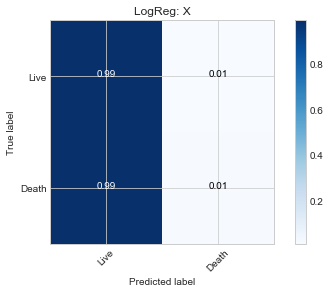

In [27]:
# Log Reg on X with equal class weights 1:1
model_report(LogisticRegression, X, 1, 'LogReg: X')

0.629955947137
[[246 139]
 [ 29  40]]
             precision    recall  f1-score   support

          0       0.89      0.64      0.75       385
          1       0.22      0.58      0.32        69

avg / total       0.79      0.63      0.68       454

Normalized confusion matrix
[[ 0.64  0.36]
 [ 0.42  0.58]]


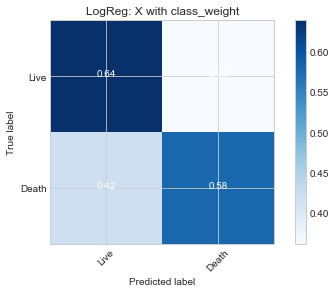

In [28]:
# Log Reg on X with class weight 5.67 since imbalanced death numbers (15%)
model_report(LogisticRegression, X, 5.67, 'LogReg: X with class_weight')

0.843612334802
[[383   2]
 [ 69   0]]
             precision    recall  f1-score   support

          0       0.85      0.99      0.92       385
          1       0.00      0.00      0.00        69

avg / total       0.72      0.84      0.78       454

Normalized confusion matrix
[[ 0.99  0.01]
 [ 1.    0.  ]]


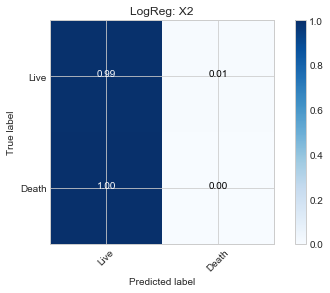

In [13]:
# X2 log reg with equal class weights 1:1
model_report(LogisticRegression, X2, 1, 'LogReg: X2')

0.607929515419
[[229 156]
 [ 22  47]]
             precision    recall  f1-score   support

          0       0.91      0.59      0.72       385
          1       0.23      0.68      0.35        69

avg / total       0.81      0.61      0.66       454

Normalized confusion matrix
[[ 0.59  0.41]
 [ 0.32  0.68]]


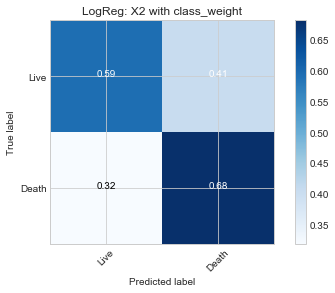

In [14]:
# X2 log reg with class weight 5.67
model_report(LogisticRegression, X2, 5.67, 'LogReg: X2 with class_weight')

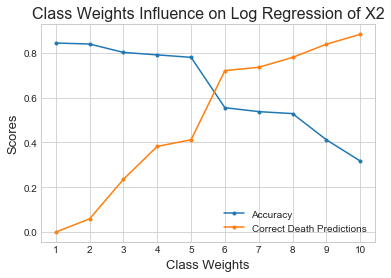

In [16]:
# Plot different class weights influence on LogReg X2
class_weights_plot(LogisticRegression, 'Class Weights Influence on Log Regression of X2')

#### Logistic Regression Conclusion
---

Since the data set is imbalanced with only 15% patient death, the results of the model without any class weight parameter to offset this imbalance favors the live column in the confusion matrix. As you can see above, the model predicts mostly all live patients to maximize the score close to 85%, the size of the live patient data.

With the class weight parameter, the death prediction score increases at the cost of the total accuracy. So in order to see the effectiveness of the model, the confusion matrix or classification report can be used to assess the death predictions.

I chose the class weight 5.67 to equalize the death to live ratio of 15 to 85. Although the correct death predictions increased, the false death predictions increased as well. The influence of class weights can be seen in the graph above. Interesting to note that the score dips dramatically around the 5.67 value.

---

### Random Forest Classifier
---

0.837004405286
[[378   7]
 [ 67   2]]
             precision    recall  f1-score   support

          0       0.85      0.98      0.91       385
          1       0.22      0.03      0.05        69

avg / total       0.75      0.84      0.78       454

Normalized confusion matrix
[[ 0.98  0.02]
 [ 0.97  0.03]]


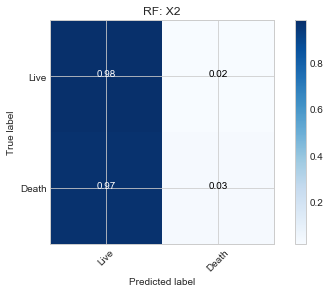

In [24]:
# X2 Random Forest Classifier with equal class weights 1:1
model_report(RandomForestClassifier, X2, 1, 'RF: X2')

0.669603524229
[[288  97]
 [ 53  16]]
             precision    recall  f1-score   support

          0       0.84      0.75      0.79       385
          1       0.14      0.23      0.18        69

avg / total       0.74      0.67      0.70       454

Normalized confusion matrix
[[ 0.75  0.25]
 [ 0.77  0.23]]


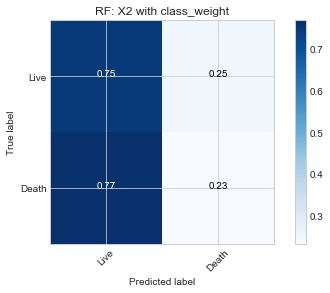

In [23]:
# X2 Random Forest Classifier with class weight 5.67
model_report(RandomForestClassifier, X2, 5.67, 'RF: X2 with class_weight')

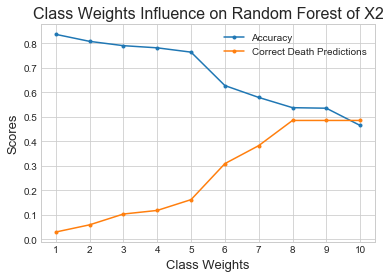

In [22]:
# Plot different class weights influence on RF classifier
class_weights_plot(RandomForestClassifier, 'Class Weights Influence on Random Forest of X2')

#### Conclusion of Random Forest Classifier
---

Similar to the Logistic Regression models, the Random Forest predicts deaths better with a class weight parameter to balance the data. The plot reveals the cost of accuracy with differing class weights. There is a noticeable change at 6 and then a relatively plateau effect after that with decreasing accuracy.

Without any additional hyperparameters, the Logistic Regression model with class weight 5.67 performs better in prediction of death, but it has more error in false predictions of both live and death patients. So, the model to choose and optimize will depend on the preference of which parts of the confusion matrix the client is interested in.

### What's next?
---

<img style="float: left; margin-left: 0px; margin-right: 10px; height: 110px" src="img/next.jpg">

To improve the models of this report, there are some options proceeding forward.

First, more data will improve the scope of the models. From analysis of this data set, it is clear that there is a significant overlap of attributes, so more patient data or perhaps creating a new data set with additional attributes could help better distinguish the differences and improve the model. If not new data recordings, there are probably similar data sets that have models that predict lung cancer deaths that could be of use in optimizing this model by using it in combination.

Another option is to optimize the models above with hyperparameter tuning. However, since the accuracy score is unreliable in determining positive death predictions, one would have to determine what score they are trying to maximize and minimize before proceeding forward in hyperparameter tuning.